# D7062E Project
## Project Group 10

Contributors:
- Theo HEMBÄCK
- PARIPÁS Viktor
- Jerker ÅBERG
- Kristofer ÅGREN

#Task 1

## Importing dependencies
We used the following libraries in the first task:
- `pandas` to manipulate the data
- `scikit-learn` for imputing and scaling the data
- `seaborn` and `matplotlib` for visualization.

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data exploration
Let's load the training dataset from the corresponding .csv file.
Since we know that the columns represent the mean/standard deviation of the positions and angles of the 60 points, respectively, followed by the label name and code, let us rename the columns accordingly to allow for easier reading.

In [ ]:
def load_data():
  training_data = pd.read_csv('train-final.csv', header=None)
  test_data = pd.read_csv('test-final.csv', header=None)

  name_mappings = {
      # Feature columns
      **{i:f'positions_mean_{i}' for i in range(60)},
      **{i:f'positions_std_{i}' for i in range(60, 120)},
      **{i:f'angles_mean_{i}' for i in range(120, 180)},
      **{i:f'angles_std_{i}' for i in range(180, 240)},
      # Label columns
      **{240: 'label_name', 241: 'label_code'},
  }

  training_data.rename(name_mappings, axis=1, inplace=True)
  training_feature_columns = training_data.columns[:-2]

  training_features = training_data[training_feature_columns]
  training_labels = training_data.label_name
  training_codes = training_data.label_code

  test_data.rename(name_mappings, axis=1, inplace=True)
  test_feature_columns = test_data.columns[:-2]

  test_features = test_data[test_feature_columns]
  test_labels = test_data.label_name

  return training_features, training_labels, training_codes, test_features, test_labels


training_features, training_labels, training_codes, test_features, test_labels = load_data()

Let's show some of the data

In [ ]:
training_features.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.403147,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.458585,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.556154,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.458485,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.498700,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550


In [ ]:
test_features.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.348333,0.426959,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.482754,0.456633,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.582908,0.412314,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.409941,0.328799,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.348730,0.311284,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775


How many different labels do we have in the training dataset?

In [ ]:
number_of_classes = training_labels.nunique()
number_of_classes

30

Now let's take a look at how many occurrences we have of each label.

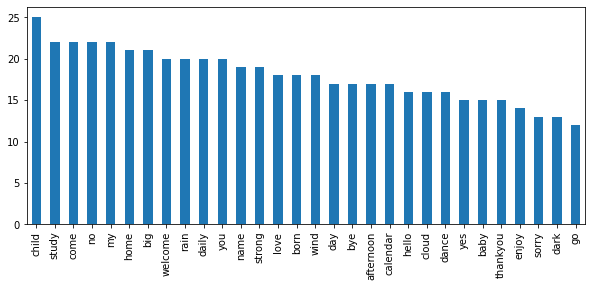

In [ ]:
training_labels.value_counts().plot(kind='bar', figsize=(10, 4))

We can see that `child` is the most common label in the training dataset and that `go` is the least common label.

Now let's look for columns that have missing values. The missing values are in the following columns (along with the missing value count):


In [ ]:
# Look for columns that have missing values
columns_null_sum = training_features.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

print(
    "Total amount of missing values in the dataframe:", 
    training_features.isnull().sum().sum()
)
print(
    "Missing values in the following column indexes (and missing value count):"
)
print(columns_with_nulls)

Some classifiers are more sensitive to the range, mean & outliers of the features, such as linear regression models, for example.
In order to be able to train a wide range of classifiers and compare them, we will need to preprocess the data for scaling and outlier treatment.

Let's see if the dataset also contains outliers. There are quite a few way to detect outliers (Source:
[Outlier detection methods in Scikit-Learn](https://scikit-learn.org/stable/modules/outlier_detection.html)):
- Isolation forest
- Local outlier factor
- One-class support vector machine (SVM)
- Elliptic envelope

We start by doing a boxplot for all features to get a visual indication of the outlier situation.

In [ ]:
training_features.boxplot(figsize=(18,7))
plt.xticks([1], [''])

Based on the boxplot, there appears to be many columns with outliers. Many classifiers, e.g. linear classifiers like Logistic Regression will not handle outliers well, so we need to find a way to handle also outliers.

## Methods

### Outliers

As we saw in the boxplot above, there are many columns with outliers. And while there are many methods to detect outliers,let's begin with just identifying the **values** that are farthest from the mean. 

A simple approach is to identify the values that lie outside of 3$\sigma$ (that is, three times the standard deviation) as outliers, and drop the rows that have at least one outlier. Let's give it a try.

In [ ]:
#training_features_outliers_marked = training_features[abs(training_features) <= 3]
from scipy import stats

training_features_outliers_marked = training_features[
    np.abs(stats.zscore(training_features.fillna(training_features.mean()))) < 3
]

In [ ]:
training_features_outliers_marked.head()

In [ ]:
training_features_outliers_removed = training_features_outliers_marked.dropna()
training_features_outliers_removed.boxplot(figsize=(18,7))
plt.xticks([1], [''])
print("Number of rows left", training_features_outliers_removed.shape[0])

The boxplot now looks better, except for the second part (columns 60 to 120), which is `positions_std_i`.
We can also see that if we remove all the rows with at least one detected outlier, we are left with less than half of the original data! This is due to the large number of features.

We need another method for this dataset, let's instead cap the outliers to 3 sigma.

In [ ]:
def pipeline_outliers(df, std_cap=3):
  df = df.copy()

  for column in df.columns:

    mean = df[column].mean(skipna = True)
    std = df[column].std(skipna = True)
    
    df[column] = np.clip(df[column], -(mean + std_cap*std), mean + std_cap*std)

  return df

In [ ]:
df = pipeline_outliers(training_features)
df.boxplot(figsize=(18,7))
plt.xticks([1], [''])

### Missing data

As we saw above, there are 6 columns that have missing values (3 or 4 missing values each). Many classifiers do not handle missing values directly, such as Logistic Regression and SVM, for example. As such we need to find a way to manage the missing values.

There are many different ways of handling missing values and we will explore a few of them here. To get started, let's examine the features/columns that contain missing data. The two visualizations chosen for each of the features/columns are:

- *Histogram* - This will give a good indication of the distribution, for example if it appears to be normal.
- *Boxplot* - We get some additional information from the boxplot showing the median, quartiles as well as outliers.

Let's plot the distributions for the columns with missing data:

In [ ]:
def plot_distributions_for_columns(dataframe, columns):
    # Plot distributions for each of the columns that have missing values
    figure, axes = plt.subplots(2, len(columns), figsize=(12, 6))

    for index, column in enumerate(columns):
        # plot a histogram of the column for the first row
        dataframe[column].plot(
            kind='hist', ax=axes[0, index], title=column, bins=15
        )
        # Do a box plot as well
        sns.boxplot(y=dataframe[column], ax=axes[1, index]).set_title(column)

    plt.tight_layout()


plot_distributions_for_columns(training_features, columns_with_nulls.index)

The distributions are quite different, which mean we may need different imputation techniques for each column.
For example, the columns `positions_mean_9` and `positions_mean_15` are clearly not normal distributions and replacing missing values with the mean would likely not be ideal.
For instance in the case of `positions_mean_9` the mean is close to 0 where few other samples are, moreover this feature may even need to be split into two separate features as it appears to be the combination of two gaussian distributions.

Also, we do not know if the missing values themselves have a significance, i.e. we might want to create a separate column to indicate that a missing value is present or not. There are relatively few rows that have missing values, though, that may limit the usefulness of this technique and usefulness will also depend on the classifier used in the end.

For now, we will implement support for the following imputation strategies:
- Replacing with **mean**
- **Drop the rows** containing at least one missing value
- **K-Nearest Neighbour (KNN)** imputation, i.e. use the mean value of the K nearest neighbours

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer

def impute(dataframe, imputer_class, **kwargs):
    imputer = imputer_class(**kwargs)
    dataframe = dataframe.copy()
    dataframe[dataframe.columns] = imputer.fit_transform(dataframe.values)
    return dataframe

# KNN imputation
def impute_knn(dataframe):
    return impute(dataframe, KNNImputer, n_neighbors=2, weights='uniform')

# Drop rows
def impute_drop_rows(dataframe):
    return dataframe.dropna()

# Mean imputation
def impute_mean(dataframe):
    return impute(
        dataframe, SimpleImputer, missing_values=np.nan, strategy='mean'
    )


Let's compare the mean and KNN imputation methods.

In [ ]:
columns_null_sum = training_features.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

In [ ]:
#training_features = training_data[training_feature_columns]
all_na_values = training_features.isna()

First let's execute both imputations individually.
Starting with the mean imputation, the imputed values are the following:

In [ ]:
training_data_mean_imputed = impute_mean(training_features)
training_data_mean_imputed.values[all_na_values]

While the KNN-imputed values look like this:

In [ ]:
training_data_knn_imputed = impute_knn(training_features)
training_data_knn_imputed.values[all_na_values]

### Comparison of mean and KNN
Now it is time to compare the results and visualize the differences on a histogram

In [ ]:
differences = (
    training_data_mean_imputed.values[all_na_values]
    - training_data_knn_imputed.values[all_na_values]
)
plt.hist(differences);

We can conclude that the differences between the methods are not significant, the mode is close to zero, for most of the missing values the two methods give very similar imputed values - more than half of the values are in the range [-0.1,0.1]

Now let's look at how the difference is distributed for each column using a boxplot and a swarm plot.


In [ ]:
na_rows, na_columns = np.where(all_na_values)
dataframe_differences_columns = pd.DataFrame(
    {'diff': differences, 'column': training_features.columns[na_columns]}
)

fig, axs = plt.subplots(ncols=2)

axis = sns.boxplot(
    x='column', data=dataframe_differences_columns, y='diff', ax=axs[0]
)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90);

axis = sns.swarmplot(
    x='column', data=dataframe_differences_columns, y='diff', ax=axs[1]
)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90);

fig.tight_layout()

When comparing the imputed values between the 'mean' and 'KNN' approaches, we see that they produce very similar values for columns `positions_mean_7` and `positions_mean_16` but larger differences by varying degrees for the other columns. The largest (absolute) deviance is for `positions_mean_9`.


Based on this it is likely that we may need to employ different imputation techniques depending on the column/feature.

For now, however, let's use KNN imputation and make sure that after the imputation there are no more missing values in our dataset. We will bring these three different methods into Task 2 of the project.


In [ ]:
# Let's create a pipeline function that uses the KNN imputation
def pipeline_missing_values(df, method = "knn"):
  df = df.copy()
  
  columns_null_sum = df.isnull().sum()
  columns_with_nulls = columns_null_sum[columns_null_sum > 0]

  if method == "knn":
    df[columns_with_nulls.index] = impute_knn(df[columns_with_nulls.index])
  elif method == "mean":
    df[columns_with_nulls.index] = impute_mean(df[columns_with_nulls.index])
  else:
    raise f"Unknown method {method}"

  assert df.isnull().sum().sum() == 0

  return df

### Scaling
First we will take a look at how the data looks by feature/column. While the dataset contains a lot of features, we can use a boxplot to get an overview understanding of how the different columns compare.

Let's make a boxplot for every feature to get an overview of how they all relate in terms of range & centre. No need to have labels for the feature names, we just want to show all of them in one plot.

In [ ]:
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

The columns are clearly not all scaled to the same range and they have different means. As such a scaler that centers the mean and normalizes (scale to the variance) may be suitable. Let's use scikit's `StandardScaler` for this.

The `StandardScaler`normalizes the data so that the mean becomes zero, and the variance one, i.e. the scaled dataset follows a *standard* normal distribution.

In [ ]:
def pipeline_scale(dataframe):
    scaler = preprocessing.StandardScaler()
    scaled_values = scaler.fit_transform(dataframe.values)
    return pd.DataFrame(scaled_values)


training_features_scaled = pipeline_scale(training_features)
training_features_scaled.head()

Looks good, i.e. the mean is about 0 and the standard deviation is around 1. All the columns have now been scaled. Let's rerun the boxplot.

In [ ]:
training_features_scaled.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

## Pipeline

In the Methods section above we have defined the pipeline methods needed for handling outliers, missing data and scaling. Let's put them all together.

In [ ]:
# Load the data
training_features, training_labels, training_codes, test_features, test_labels = load_data()

# Plot before pipeline
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

In [ ]:
test_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

Run the pipeline and rerun the boxplot on the resulting dataset

In [ ]:
def run_data_pipeline(features, std_cap = 3, impute_method = "knn"):
  df = pipeline_outliers(features, std_cap=std_cap)
  df = pipeline_missing_values(df, method = impute_method)
  df = pipeline_scale(df)

  return df

train_df = run_data_pipeline(training_features)
train_df.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

In [ ]:
test_df = run_data_pipeline(test_features)

test_df.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

#Task 2

The following observations have been made of the dataset and affects how models should be trained: 

- There are low number, less than 30, of samples per class. As such, overfitting will likely be a problem with more advanced classifiers like decision trees, for example. To address this, we will use a Cross Validation method to evaluate the fit. Furthermore, to ensure we have the same distribution in each fold of the CV, a stratified fold method will be used.
- The data set is very 'wide' - that is there are a very large amount of features (240) compared to the number of samples (540). To address this, a feature reduction will be used. There are many options for reducing features, such as removing features with strong correlation, low variance or fitting a classifier and removing those features that have low importance. Dimensionality reduction approaches are also common, such as Principal Component Analysis, for example. 
- We will compare RFE to PCA, and select the best performing option.

## Feature reduction

### RFE 

To reduce features, we have selected a Recursive Feature Elimination method using a Support Vector Machine classifier. The reason for selecting a SVM classifier is the combination of speed and the ability to capture non-linearities in the dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import svm

train_df = run_data_pipeline(training_features, std_cap = 6, impute_method="mean")

from sklearn.linear_model import LogisticRegression

def reduce(n_feats):

    rfe_selector = RFECV(estimator=svm.SVC(kernel = 'linear'), 
                        cv = StratifiedKFold(n_splits = 10), 
                        min_features_to_select = n_feats, step = 1, n_jobs=4)

    rfe_selector.fit(train_df, training_labels)

    selected_cols = train_df.columns[rfe_selector.get_support()]
    score = np.mean(rfe_selector.cv_results_["mean_test_score"])

    print(n_feats, len(selected_cols), score)

    return selected_cols, score

# Evaluate a few different minimum features to select
rfe_results = [reduce(n) for n in [15, 45]]

As seen above, the cross validated performance peaks at 40 selected features, at around an accuracy of 0.851.

### PCA

Let's also look at how PCA would perform, also evaluating it using the same SVM classifiers as in the RFE case and same amount of CV folds (10). Code below is based on sklearn example at https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pca = PCA()

pipe = Pipeline(steps=[("pca", pca), ("svm", svm.SVC(kernel="linear"))])
param_grid = {
    "pca__n_components": np.arange(10,100,5)
}
search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=4)
search.fit(train_df, training_labels)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Using PCA, we achieve the highest accuracy of 0.804 on the same cross validated classifiers as RFE above using 85 PCA components.

### Conclusion

The RFE approach gives us higher accuracy with fewer features than PCA, so we will select the RFE approach instead.

In [ ]:
rfe_best_ix = np.argmin([score for _,score in rfe_results])
rfe_columns,_ = rfe_results[rfe_best_ix]

train_reduced_df = train_df[train_df.columns[rfe_columns]]
test_reduced_df = test_df[test_df.columns[rfe_columns]]

## Model selection
First we get a baseline score for some of the avaliable classifiers in sklearn. The classifiers are imported from sklearn along with classification metrics for evaluation. The baseline scores are calculated using cross validation with 10 folds.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_validate

###Training and evaluation on the training set

We create a function that trains and evaluates a model for each of the selected classifiers with default hyperparameters and run it on the feature-reduced training data set.

In [ ]:
def evaluate_all_classifiers(train_df):
    classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    MLPClassifier(),
    # use dummy classifier to get a baseline
    DummyClassifier(strategy="most_frequent")
    ]

    all_results = []

    scoring =["accuracy","precision_macro", "recall_macro", "f1_macro"]

    for clf in classifiers:

        scores = cross_validate(clf, train_df, training_labels, scoring=scoring, cv=10, return_train_score = True)

        print(f"Classifier: {clf.__class__.__name__}", "test accuracy", np.mean(scores["test_accuracy"]))

        scores_mean = {a:np.mean(scores[a]) for a in scores.keys()}
        scores_mean["classifier"] = clf.__class__.__name__

        # save the evaluation results in a dataframe
        all_results.append(pd.DataFrame([scores_mean]))

    return pd.concat(all_results)

results = evaluate_all_classifiers(train_reduced_df)

###Baseline scores

In [ ]:
results.sort_values(by=['test_accuracy'])

###Conclusion

The best performing classifier (using CV with 10 folds) is the `ExtraTreeClassifier` with an accuracy of approximately 0.93.

##Fine-tuning models

Next step is to find optimal hyperparameters on the best performing classifier, `ExtraTreesClassifier`. We will do so by doing a CV Grid Search and will tune the following hyperparameters of the classifier:

- n_estimators, controls the number of trees generated. Higher can give better performance, but may also increase likelihood of overfitting. The default value is 100 so we will probe around that value.
- max_depth, the maximum depth of the tree. The default value is None, i.e. the max depth is not restricted so we first tested a wide range and concluded around 16 gives good results.


In [ ]:
param_grid = {'n_estimators': np.arange(95,105,1),
               'max_depth': [15,16,17,18],
               'bootstrap': [False, True]}

cv = StratifiedKFold(n_splits=10)

searchCV = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42), scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True, n_jobs = 4)

searchCV.fit(train_reduced_df, training_labels)

In [ ]:
searchCV.best_params_, searchCV.best_score_

({'bootstrap': False, 'max_depth': 18, 'n_estimators': 102},
 0.9407407407407407)

This gives the following best parameters to use in the evaluation on the test set:


1.   max_depth: 18
2.   n_estimators: 2



##Evaluation on the test set

###Choice of models to evaluate

We choose to evaluate the the models with the top five `test_accuracy` from the model selection section:

1.   `ExtraTreesClassifier` - 0.928
2.   `LogisticRegression` - 0.896
3.   `MLPClassifier` - 0.888
4.   `SVC` - 0.888
5.   `RandomForrestClassifier` - 0.885

After these five models the accuracy starts to drop off a bit.

###Evaluation

We fit the models to the preprocessed and feature-reduced training set, run predictions on the test set run through the same preprocessing and feature reduction and use `accuracy_score` from `sklearn.metrics` to get the final accuracy scores.

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate_models(training_features, training_labels, test_features, test_labels, classifiers):
    prediction_scores = {}

    for index, clf in enumerate(classifiers):
      clf.fit(training_features, training_labels)
      prediction = clf.predict(test_features)
      prediction_scores[clf.__class__.__name__] = (accuracy_score(test_labels, prediction))
    return(prediction_scores)

class ExtraTreesClassifier_Finetuned(ExtraTreesClassifier):

    def __init__(self):
      ExtraTreesClassifier.__init__(self, n_estimators=102, max_depth=18, random_state=42)

classifiers = [
      ExtraTreesClassifier(),
      ExtraTreesClassifier_Finetuned(),
      LogisticRegression(),
      MLPClassifier(),
      SVC(),
      RandomForestClassifier()
      ]

prediction_scores = evaluate_models(train_reduced_df, training_labels, test_reduced_df, test_labels, classifiers)
prediction_scores

{'ExtraTreesClassifier': 0.9166666666666666,
 'ExtraTreesClassifier_Finetuned': 0.9333333333333333,
 'LogisticRegression': 0.8462962962962963,
 'MLPClassifier': 0.85,
 'SVC': 0.8703703703703703,
 'RandomForestClassifier': 0.8925925925925926}

Plot the performance (accuracy) of the classifiers on the train vs test dataset. 

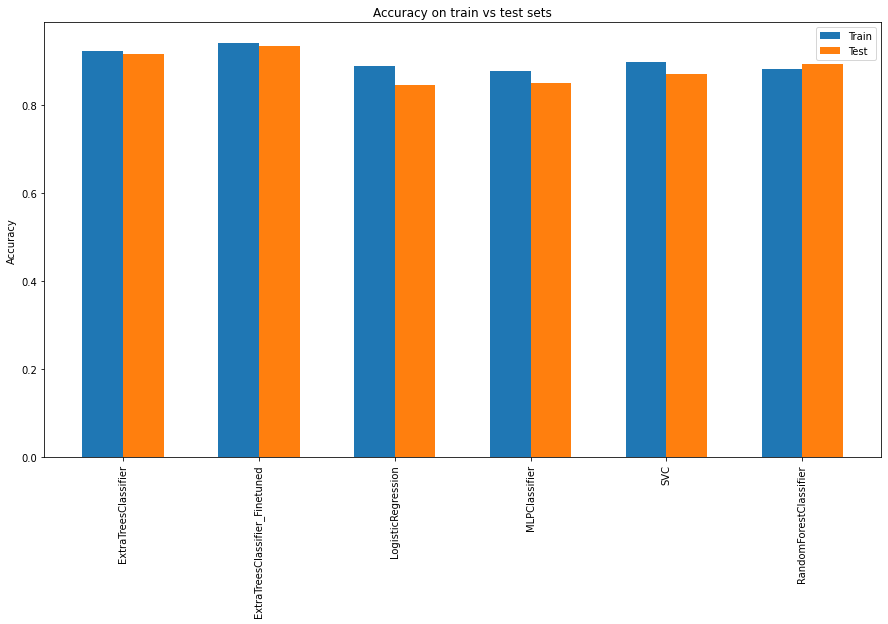

In [ ]:

classifiers = ['ExtraTreesClassifier', 
               'ExtraTreesClassifier_Finetuned', 
               'LogisticRegression',
               'MLPClassifier',
                'SVC',
                'RandomForestClassifier']

N = len(classifiers)

train_results_df = pd.concat([results, pd.DataFrame([{"classifier": "ExtraTreesClassifier_Finetuned", 
                                                 "test_accuracy" : searchCV.best_score_}])])

train_results_df = train_results_df.set_index("classifier")

# Specify the values of blue bars (height)
blue_bar = train_results_df.loc[classifiers]["test_accuracy"].values
# Specify the values of orange bars (height)
orange_bar = [prediction_scores[c] for c in classifiers]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,8))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Train')
plt.bar(ind + width, orange_bar, width, label='Test')

plt.ylabel('Accuracy')
plt.title('Accuracy on train vs test sets')

plt.xticks(ind + width / 2, ('ExtraTreesClassifier', 
                             'ExtraTreesClassifier_Finetuned', 
                             'LogisticRegression',
                              'MLPClassifier',
                             'SVC',
                             'RandomForestClassifier'),
           rotation = 90)


# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Conclusion


The prediction scores for the test set and the scores from the training were fairly close. The use of Cross Validation (and a high number of folds = 10) gave a good estimation of the performance on an unseen dataset.

The dataset is very 'wide' with about 2 times the amount of rows/samples as there are features. We attempted two methods of feature/dimensionality reduction, RFE and PCA. RFE proved to work the best on the cross validated train data set.

The best performing (in terms of accuracy) classifier on both train & test datasets was `ExtraTreesClassifier`, which seems to neither be over- or underfiting as the scores on both the training and test data are pretty close.

The `LogisticRegression`, `MLPClassifier` and `SVC` classifiers all seems to be over- or underfitting slightly as their scores on the test set are a bit lower than on the training set.

`RandomForestClassifier` is actually performing a bit better on the test set than on the training set.

The tuned `ExtraTreesClassifier` does perform a bit better than the model with standard hyperparameters, it could perhaps be even better with some more tuning. On the other hand, more tuning could also risk overfitting it to the test set, which is why it's probably best to leave it as is.

# Task 3